<a href="https://colab.research.google.com/github/Light-Yagami14/ML_Project/blob/main/Trained_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:2050, 1:2].values
test_set = dataset_train.iloc[2050:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 14s 129ms/step - loss: 0.0138
Epoch 2/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0036
Epoch 3/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0031
Epoch 5/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0027
Epoch 7/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0024
Epoch 10/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0023
Epoch 11/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0022
Epoch 13/100

In [ ]:
dataset_train.iloc[:2050, 1:2]

,Open
0,210.60
1,214.95
2,219.00
3,219.95
4,222.00
...,...
2045,128.00
2046,125.00
2047,124.40
2048,121.30


In [ ]:
dataset_total = pd.concat((dataset_train.iloc[:2050, 1:2],dataset_train.iloc[2050:, 1:2]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


IndexError: ignored

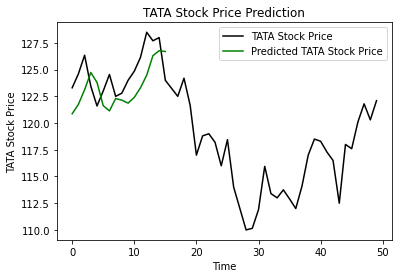

In [ ]:
plt.plot(test_set, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()